In [1]:
import os
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

import warnings
from collections import Counter
import datetime
import wordcloud
import json
import plotly.offline as py

In [3]:
warnings.filterwarnings('ignore')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
#%matplotlib notebook

# Goals of the analysis
We want to answer questions like:

1) How many views do our trending videos have? Do most of them have a large number of views? Is having a large number of views required for a video to become trending?

2) The same questions above, but applied to likes and comment count instead of views.

3) Which video remained the most on the trendin-videos list?

4) How many trending videos contain a fully-capitalized word in their titles?

5) What are the lengths of trending video titles? Is this length related to the video becoming trendy?

6) How are views, likes, dislikes, comment count, title length, and other attributes correlate with (relate to) each other? How are they connected?

7) What are the most common words in trending video titles?

8) Which YouTube channels have the largest number of trending videos?

9) Which video category (e.g. Entertainment, Gaming, Comedy, etc.) has the largest number of trending videos?

10) When were trending videos published? On which days of the week? at which times of the day?

# Reading Dataaset

In [4]:
df = pd.read_csv("USvideos.csv")

In [5]:
PLOT_COLORS =["#268bd2", "#0052CC", "#FF5722", "#b58900", "#003f5c"]
pd.options.display.float_format = '{:.2f}'.format
sns.set(style="ticks")
plt.rc('figure', figsize=(8, 5), dpi=100)
plt.rc('axes', labelpad=20, facecolor="#ffffff", linewidth=0.4, grid=True, labelsize=14)
plt.rc('patch', linewidth=0)
plt.rc('xtick.major', width=0.2)
plt.rc('ytick.major', width=0.2)
plt.rc('grid', color='#9E9E9E', linewidth=0.4)
plt.rc('font', family='Arial', weight='400', size=10)
plt.rc('text', color='#282828')
plt.rc('savefig', pad_inches=0.3, dpi=300)

In [6]:
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40949 non-null  object
 1   trending_date           40949 non-null  object
 2   title                   40949 non-null  object
 3   channel_title           40949 non-null  object
 4   category_id             40949 non-null  int64 
 5   publish_time            40949 non-null  object
 6   tags                    40949 non-null  object
 7   views                   40949 non-null  int64 
 8   likes                   40949 non-null  int64 
 9   dislikes                40949 non-null  int64 
 10  comment_count           40949 non-null  int64 
 11  thumbnail_link          40949 non-null  object
 12  comments_disabled       40949 non-null  bool  
 13  ratings_disabled        40949 non-null  bool  
 14  video_error_or_removed  40949 non-null  bool  
 15  de

# Use lambda Funtion for Cleaning

In [8]:
df[df["description"].apply(lambda x:pd.isna(x))].head(3)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
42,NZFhMSgbKKM,17.14.11,Dennis Smith Jr. and LeBron James go back and ...,Ben Rohrbach,17,2017-11-13T15:11:00.000Z,[none],945,7,5,8,https://i.ytimg.com/vi/NZFhMSgbKKM/default.jpg,False,False,False,NaN
47,sbcbvuitiTc,17.14.11,Stephon Marbury and Jimmer Fredette fight in C...,NBA Highlights · YouTube,17,2017-11-10T18:23:05.000Z,"NBA|""Basketball""|""Sports""",956169,2017,2425,1447,https://i.ytimg.com/vi/sbcbvuitiTc/default.jpg,False,False,False,NaN
175,4d07RXYLsJE,17.14.11,Sphaera - demonstrating interaction,Jenny Hanell,28,2017-11-04T20:48:16.000Z,[none],1827,3,0,2,https://i.ytimg.com/vi/4d07RXYLsJE/default.jpg,False,False,False,NaN


In [9]:
df["description"] = df["description"].fillna(value="")

# Years wise Data collection

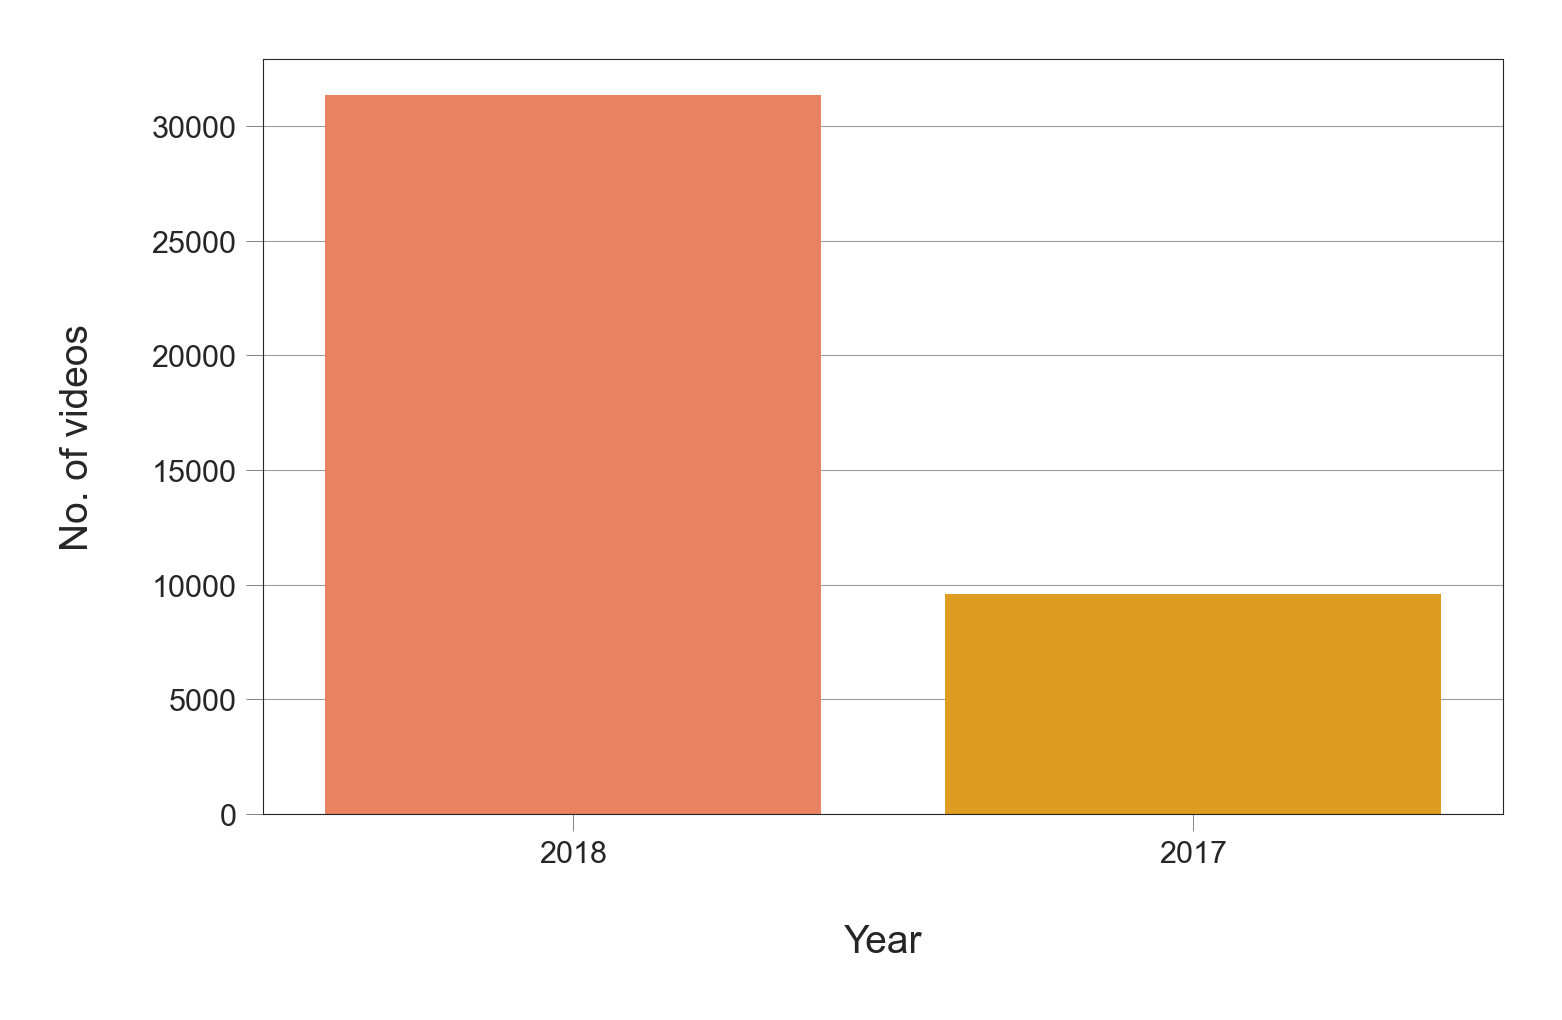

In [10]:
cdf = df["trending_date"].apply(lambda x: '20' + x[:2]).value_counts() \
            .to_frame().reset_index() \
            .rename(columns={"index": "year", "trending_date": "No_of_videos"})

fig, ax = plt.subplots()
_ = sns.barplot(x="year", y="No_of_videos", data=cdf, 
                palette=sns.color_palette(['#ff764a', '#ffa600'], n_colors=7), ax=ax)
_ = ax.set(xlabel="Year", ylabel="No. of videos")

In [11]:
df["trending_date"].apply(lambda x: '20' + x[:2]).value_counts(normalize = True)

2018   0.77
2017   0.23
Name: trending_date, dtype: float64

# Statistical information about numerical columns of dataset

In [12]:
df.describe()

,category_id,views,likes,dislikes,comment_count
count,40949.00,40949.00,40949.00,40949.00,40949.00
mean,19.97,2360784.64,74266.70,3711.40,8446.80
std,7.57,7394113.76,228885.34,29029.71,37430.49
min,1.00,549.00,0.00,0.00,0.00
25%,17.00,242329.00,5424.00,202.00,614.00
50%,24.00,681861.00,18091.00,631.00,1856.00
75%,25.00,1823157.00,55417.00,1938.00,5755.00
max,43.00,225211923.00,5613827.00,1674420.00,1361580.00


# There we noted:
    ✡ The average number of views of a trendings video is 2,360,784. The Median value for the number of views is 681,861.
    ✡The average number if likes of trendings video is 74,266. while the average number of dislikes is 3,711.
    ✡The average number of comments of a trendings video is 8,446. while the median is 1,856.

# View Histogram

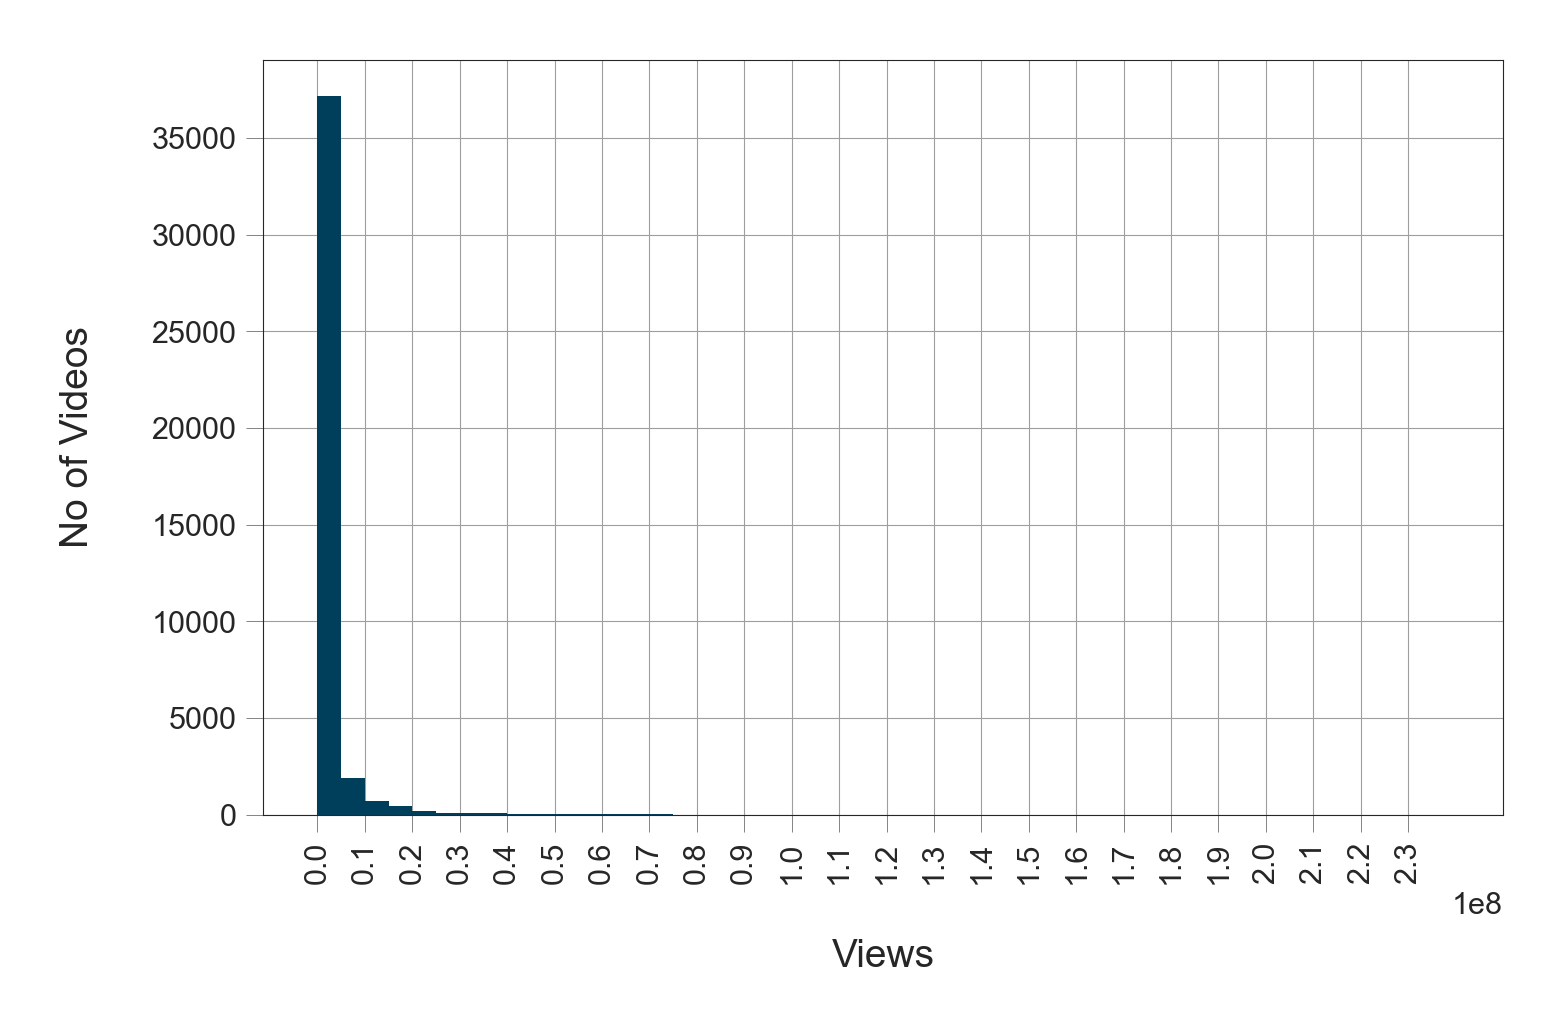

In [13]:
fig, ax = plt.subplots()
_=sns.distplot(df["views"], kde=False, color=PLOT_COLORS[4],
                  hist_kws={'alpha': 1},bins=np.linspace(0, 2.3e8, 47), ax=ax)
_=ax.set(xlabel="Views",ylabel="No of Videos",xticks=np.arange(0, 2.4e8, 1e7))
_=ax.set_xlim(right=2.5e8)
_=plt.xticks(rotation=90)

We note that the vast majority of trending videos have 5 million views or less. We get the 5 million number by calculating

\begin{align}
\frac{0.1 \times 10^8}{2} = 5 \times 10^6
\end{align}
 
Now let us plot the histogram just for videos with 25 million views or less to get a closer look at the distribution of the data

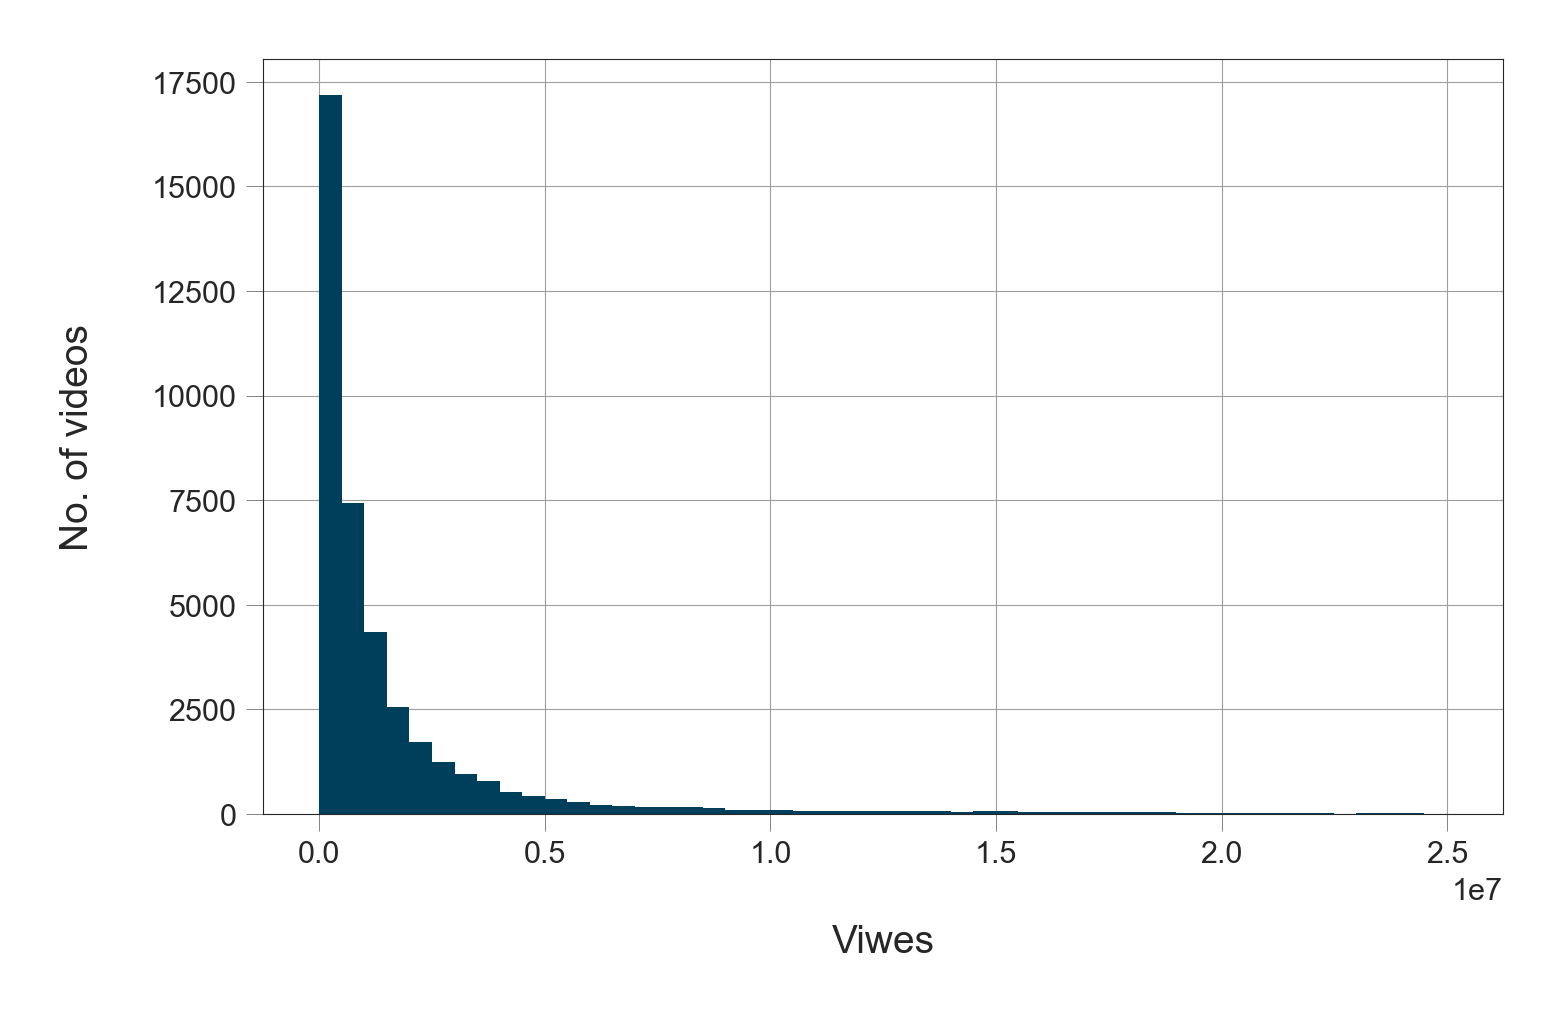

In [14]:
fig, ax = plt.subplots()
_=sns.distplot(df[df['views'] < 25e6]["views"], kde=False,
              color=PLOT_COLORS[4], hist_kws={'alpha': 1}, ax=ax)
_= ax.set(xlabel="Viwes", ylabel="No. of videos")

Now we see that most mejority of trending videos have `1` million views or less. let's see the exact percentage of videos less than `1` million views

In [18]:
df[df['views'] < 1e6 ]['views'].count() /df['views'].count()*100

60.09426359618062

So, it is around `60%`. Similarly, we can see that the percentage of videos with less than `1.5` million views is around `71%`, and that the percentage of videos with less than `5` million views is around `91%`.


In [20]:
df.head(5)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


### <a name="lh"></a>Likes histogram

After `views`, we plot the histogram for `likes` column

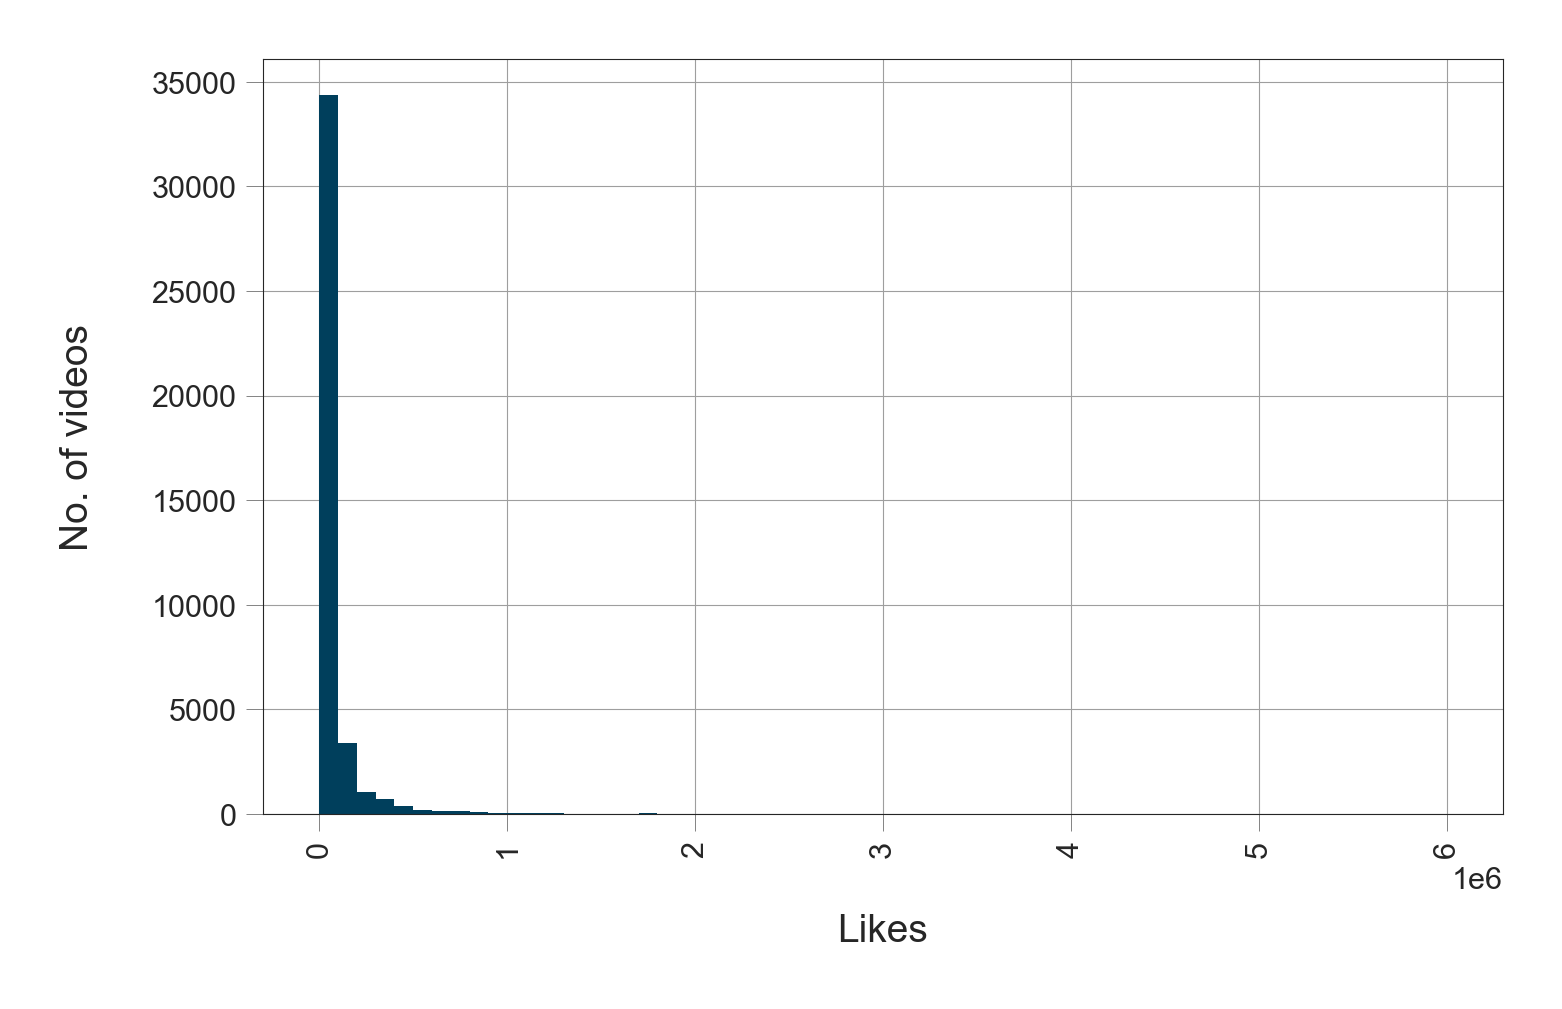

In [49]:
plt.rc('figure.subplot', wspace=0.9)
fig, ax = plt.subplots()
_=sns.distplot(df['likes'], kde=False,
               color=PLOT_COLORS[4], hist_kws={'alpha': 1},
               bins=np.linspace(0, 6e6, 61), ax=ax)
_= ax.set(xlabel="Likes", ylabel="No. of videos")
_=plt.xticks(rotation=90)

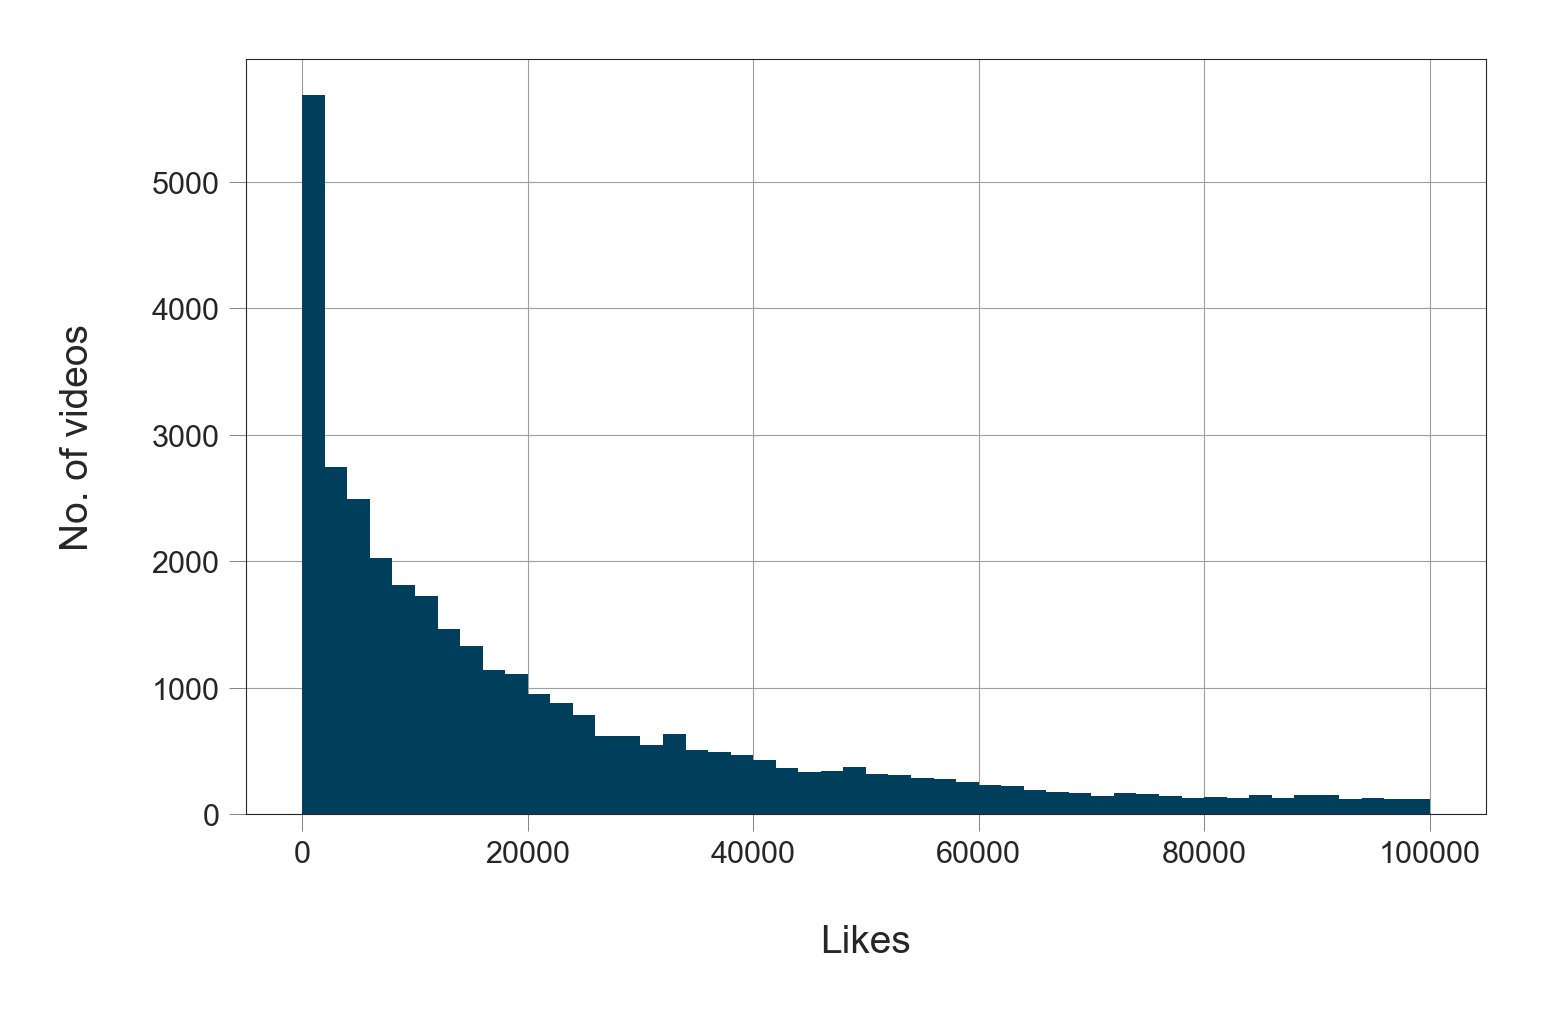

In [56]:
fig, ax = plt.subplots()
_ = sns.distplot(df[df["likes"] <= 1e5]["likes"],kde=False,
                 color=PLOT_COLORS[4], hist_kws={'alpha': 1}, ax=ax)
_ = ax.set(xlabel="Likes", ylabel="No. of videos")

Now we can see that the majority of trending videos have `40,000` likes or less with peak for videos with `2000` likew or less

Let's see the exact parcentage of videos with less than `40,000` likes

In [57]:
df[df['likes'] <4e4]['likes'].count() /df['likes'].count() *100

68.4900730176561

Similarly, we can see that the percentage of videos with less than `100,000` likes is around `80%`

# histogram of commment

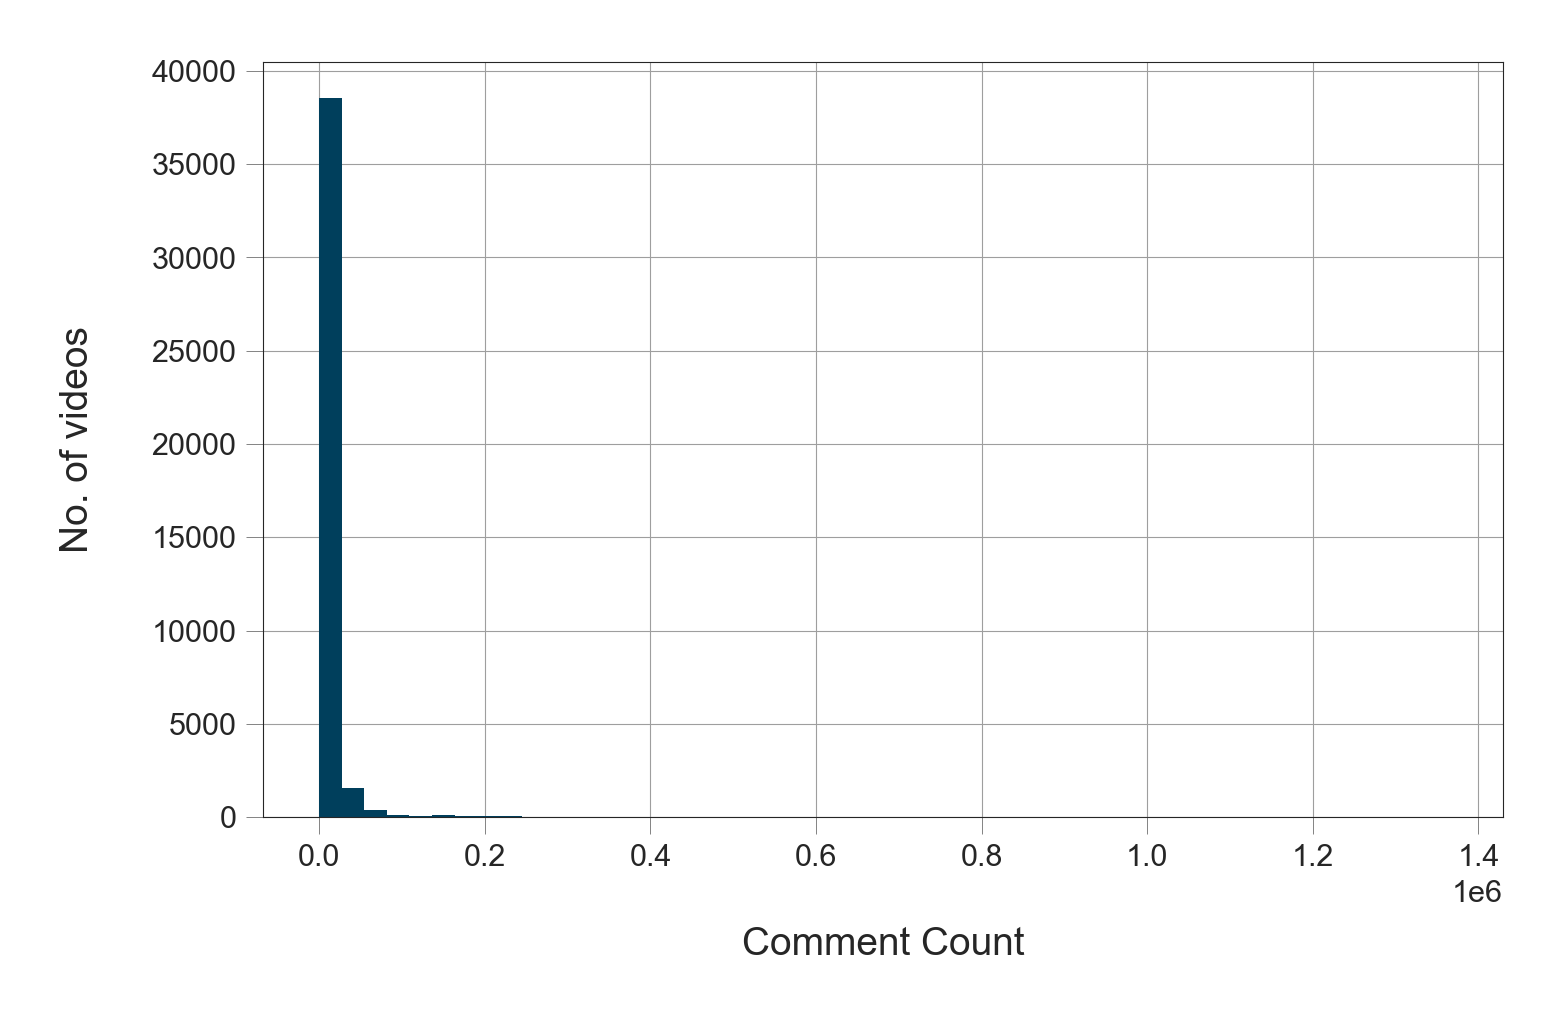

In [60]:
fig,ax = plt.subplots()
_=sns.distplot(df['comment_count'], kde=False, rug=False,
              color=PLOT_COLORS[4], hist_kws={'alpha': 1}, ax=ax)
_=ax.set(xlabel="Comment Count", ylabel="No. of videos")

let's get closer look by emiminating entries with comment count larger than `200,000` comment

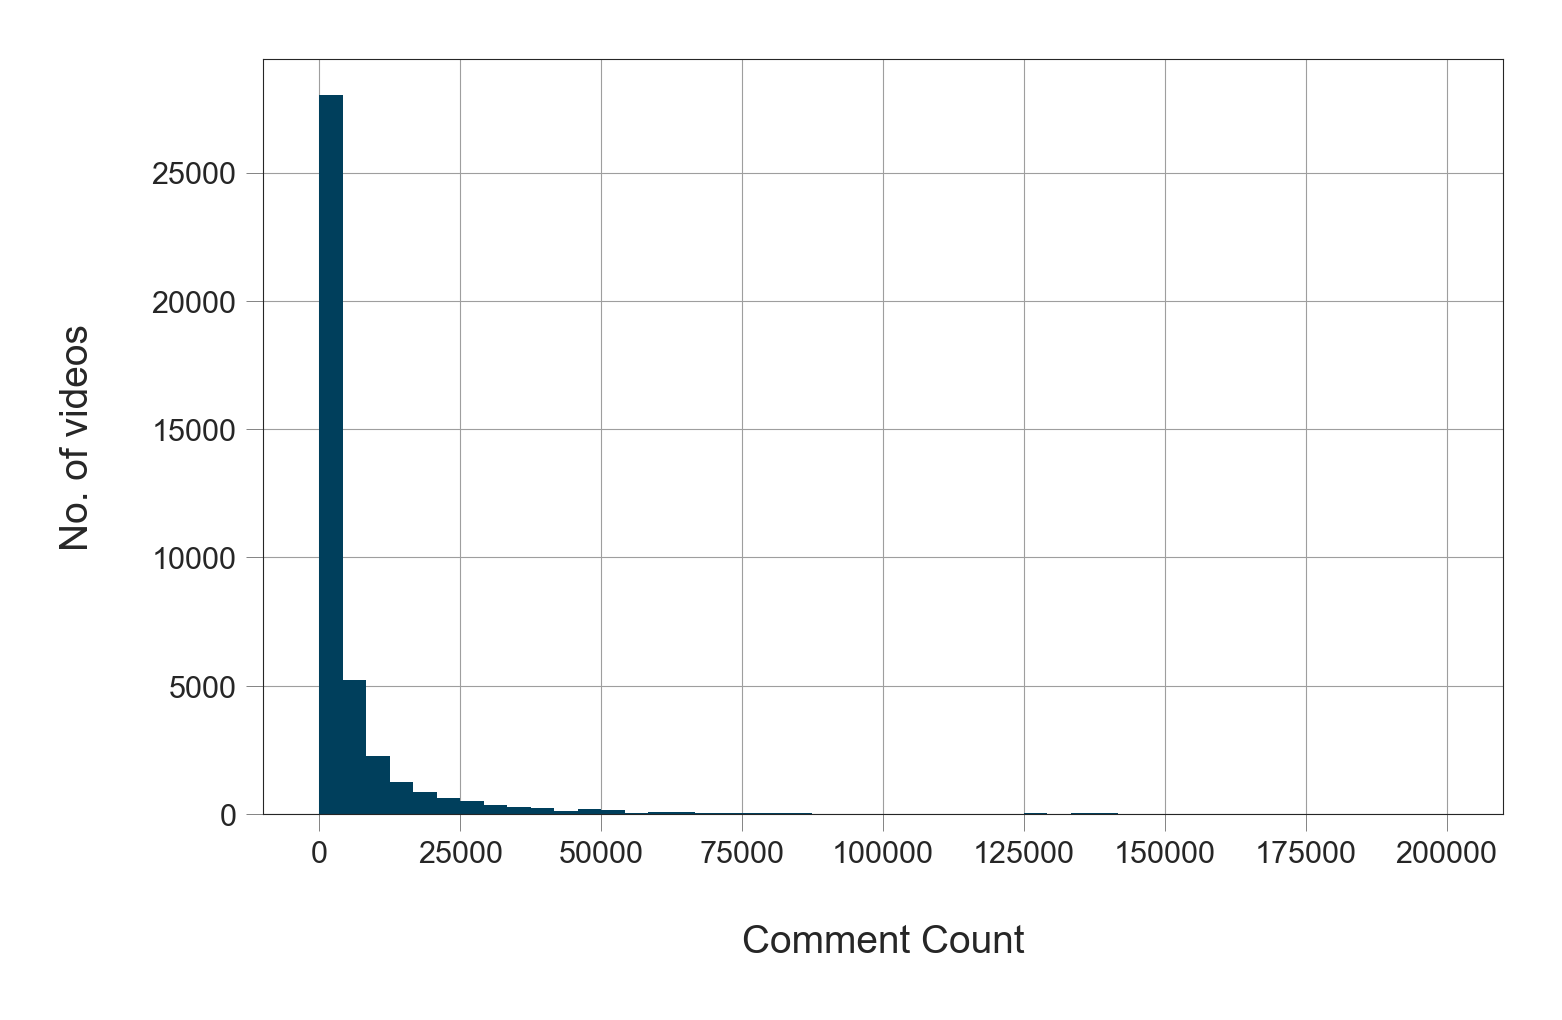

In [67]:
fig,  ax= plt.subplots()
_ = sns.distplot(df[df["comment_count"] < 200000]["comment_count"], kde=False, rug=False, 
                 color=PLOT_COLORS[4], hist_kws={'alpha': 1}, 
                 bins=np.linspace(0, 2e5, 49), ax=ax)
_=ax.set(xlabel="Comment Count", ylabel="No. of videos")

We see that most trending videos have around

\begin{align}
\frac{25000}{6} \approx 4166 \text{ comments}
\end{align}

since each division in the graph has six histogram bins. 

As with views and likes, let's see the exact percentage of videos with less than `4000` comments

In [70]:
df[df['comment_count'] < 4000 ]['comment_count'].count() / df['comment_count'].count()*100

67.48882756599673

In [ ]:
In a similar way,we can see that the percentage of videos with less than `25,000` comments is around 93%`